# COVID and Ontario Licensed Child Care


In [19]:
import pandas as pd
import datetime
import io
from io import StringIO
import os
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

%matplotlib inline
# import naming conventions 
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)

In [20]:
url = 'https://data.ontario.ca/dataset/5bf54477-6147-413f-bab0-312f06fcb388/resource/eee282d3-01e6-43ac-9159-4ba694757aea/download/lccactivecovid.csv'
response = requests.get(url)
s = requests.get(url).text
covid = pd.read_csv(StringIO(s))

## Toronto (new cases per date)

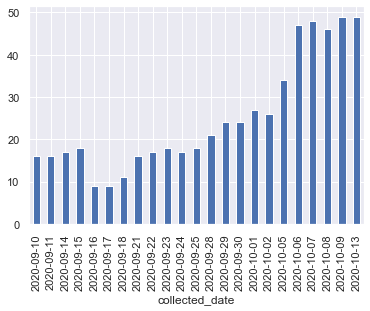

In [21]:
covid_tor = covid.loc[(covid['municipality'] == 'Toronto')]
covid_tor.set_index('collected_date')
covid_sum_tor = covid_tor.groupby('collected_date')['total_confirmed_cases'].sum().to_frame(name='sum')
covid_sum_tor
covid_sum_tor['sum'].plot(kind='bar', color='b')

## All municipalities in Ontario (inclusive of Toronto; new cases per date)

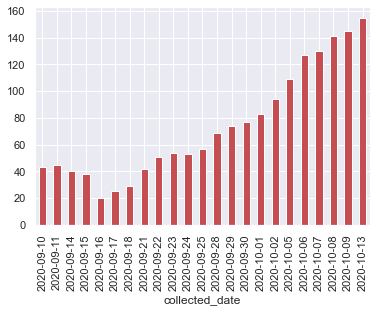

In [22]:
covid_all = covid
covid_all.set_index('collected_date')
covid_sum_all = covid_all.groupby('collected_date')['total_confirmed_cases'].sum().to_frame(name='sum')
covid_sum_all['sum'].plot(kind='bar', color='r')